1. Definir las librerías a utilizar

In [ ]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
df = pd.read_csv('/content/51f7ab6a-24ed-4a06-9f5d-04873f1673fd_Data-1.csv')
df.head()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,..,...,68.0408782958984,89.5,71.5,97.7,97.7,93.4308776855469,97.7,97.7,97.7,..
1,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,..,..,..,..,..,..,...,60.2391977225107,86.5005116269173,64.5733543829493,97.0993598284929,97.0919732482142,91.6060600230095,97.0756269501314,97.0667125932952,97.0572022178384,..
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,..,..,..,..,..,..,...,0.29808781267706,0.283692395910162,0.297971774718822,0.268358772656602,0.281195815732375,0.299082634225993,0.297563650500103,0.223478872007068,..,..
3,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,..,..,..,..,..,...,5.60074465808174,2.72454336394887,1.45131466009762,2.26031420130457,2.6470032019574,1.18922812838036,3.91160341942292,-2.3511006734461,-20.7388393676343,..
4,Afghanistan,AFG,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,0.170626997947693,..,..,..,..,..,...,0.53,0.5,0.5,0.5,0.39,..,..,..,..,..


2. Verificar la información que tenemos

In [ ]:
df.dtypes
#se observa que es una base de datos de tipo wide

Country Name     object
Country Code     object
Series Name      object
Series Code      object
1960 [YR1960]    object
                  ...  
2018 [YR2018]    object
2019 [YR2019]    object
2020 [YR2020]    object
2021 [YR2021]    object
2022 [YR2022]    object
Length: 67, dtype: object

In [ ]:
df.isnull().sum()


Country Name     3
Country Code     5
Series Name      5
Series Code      5
1960 [YR1960]    5
                ..
2018 [YR2018]    5
2019 [YR2019]    5
2020 [YR2020]    5
2021 [YR2021]    5
2022 [YR2022]    5
Length: 67, dtype: int64

In [ ]:
df.rename(columns={"Series Name": "Series_Name"}, inplace=True)

In [ ]:
df.Series_Name.value_counts()

Access to electricity (% of population)                 266
Access to electricity, rural (% of rural population)    266
CO2 emissions (metric tons per capita)                  266
GDP growth (annual %)                                   266
Hospital beds (per 1,000 people)                        266
Labor force, female (% of total labor force)            266
Name: Series_Name, dtype: int64

3. Eliminar variables irrelevantes

In [ ]:
df = df.drop('Country Code', axis=1)
df.head()

,Country Name,Series_Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,..,..,...,68.0408782958984,89.5,71.5,97.7,97.7,93.4308776855469,97.7,97.7,97.7,..
1,Afghanistan,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,..,..,..,..,..,..,..,...,60.2391977225107,86.5005116269173,64.5733543829493,97.0993598284929,97.0919732482142,91.6060600230095,97.0756269501314,97.0667125932952,97.0572022178384,..
2,Afghanistan,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,..,..,..,..,..,..,..,...,0.29808781267706,0.283692395910162,0.297971774718822,0.268358772656602,0.281195815732375,0.299082634225993,0.297563650500103,0.223478872007068,..,..
3,Afghanistan,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,..,..,..,..,..,..,...,5.60074465808174,2.72454336394887,1.45131466009762,2.26031420130457,2.6470032019574,1.18922812838036,3.91160341942292,-2.3511006734461,-20.7388393676343,..
4,Afghanistan,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,0.170626997947693,..,..,..,..,..,..,...,0.53,0.5,0.5,0.5,0.39,..,..,..,..,..


In [ ]:
df = df.drop('Series Code', axis=1)
df.head()

,Country Name,Series_Name,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,Access to electricity (% of population),..,..,..,..,..,..,..,..,...,68.0408782958984,89.5,71.5,97.7,97.7,93.4308776855469,97.7,97.7,97.7,..
1,Afghanistan,"Access to electricity, rural (% of rural popul...",..,..,..,..,..,..,..,..,...,60.2391977225107,86.5005116269173,64.5733543829493,97.0993598284929,97.0919732482142,91.6060600230095,97.0756269501314,97.0667125932952,97.0572022178384,..
2,Afghanistan,CO2 emissions (metric tons per capita),..,..,..,..,..,..,..,..,...,0.29808781267706,0.283692395910162,0.297971774718822,0.268358772656602,0.281195815732375,0.299082634225993,0.297563650500103,0.223478872007068,..,..
3,Afghanistan,GDP growth (annual %),..,..,..,..,..,..,..,..,...,5.60074465808174,2.72454336394887,1.45131466009762,2.26031420130457,2.6470032019574,1.18922812838036,3.91160341942292,-2.3511006734461,-20.7388393676343,..
4,Afghanistan,"Hospital beds (per 1,000 people)",0.170626997947693,..,..,..,..,..,..,..,...,0.53,0.5,0.5,0.5,0.39,..,..,..,..,..


In [ ]:
df.shape

(1601, 65)

4. Tratar los valores nulos

para esto se trabaja con la suposición de que si es que para un determinado período no hay registro entonces se le considera como 0

In [ ]:
df[ df=='..' ] = np.NaN
df

,Country Name,Series_Name,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0408782958984,89.5,71.5,97.7,97.7,93.4308776855469,97.7,97.7,97.7,NaN
1,Afghanistan,"Access to electricity, rural (% of rural popul...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.2391977225107,86.5005116269173,64.5733543829493,97.0993598284929,97.0919732482142,91.6060600230095,97.0756269501314,97.0667125932952,97.0572022178384,NaN
2,Afghanistan,CO2 emissions (metric tons per capita),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.29808781267706,0.283692395910162,0.297971774718822,0.268358772656602,0.281195815732375,0.299082634225993,0.297563650500103,0.223478872007068,NaN,NaN
3,Afghanistan,GDP growth (annual %),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.60074465808174,2.72454336394887,1.45131466009762,2.26031420130457,2.6470032019574,1.18922812838036,3.91160341942292,-2.3511006734461,-20.7388393676343,NaN
4,Afghanistan,"Hospital beds (per 1,000 people)",0.170626997947693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.53,0.5,0.5,0.5,0.39,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1599,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

Country Name     0
Series_Name      0
1960 [YR1960]    0
1961 [YR1961]    0
1962 [YR1962]    0
                ..
2018 [YR2018]    0
2019 [YR2019]    0
2020 [YR2020]    0
2021 [YR2021]    0
2022 [YR2022]    0
Length: 65, dtype: int64

In [ ]:
df.head()

,Country Name,Series_Name,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,Access to electricity (% of population),0,0,0,0,0,0,0,0,...,68.0408782958984,89.5,71.5,97.7,97.7,93.4308776855469,97.7,97.7,97.7,0
1,Afghanistan,"Access to electricity, rural (% of rural popul...",0,0,0,0,0,0,0,0,...,60.2391977225107,86.5005116269173,64.5733543829493,97.0993598284929,97.0919732482142,91.6060600230095,97.0756269501314,97.0667125932952,97.0572022178384,0
2,Afghanistan,CO2 emissions (metric tons per capita),0,0,0,0,0,0,0,0,...,0.29808781267706,0.283692395910162,0.297971774718822,0.268358772656602,0.281195815732375,0.299082634225993,0.297563650500103,0.223478872007068,0,0
3,Afghanistan,GDP growth (annual %),0,0,0,0,0,0,0,0,...,5.60074465808174,2.72454336394887,1.45131466009762,2.26031420130457,2.6470032019574,1.18922812838036,3.91160341942292,-2.3511006734461,-20.7388393676343,0
4,Afghanistan,"Hospital beds (per 1,000 people)",0.170626997947693,0,0,0,0,0,0,0,...,0.53,0.5,0.5,0.5,0.39,0,0,0,0,0


In [ ]:
nuevos_nombres = [re.search(r'\[([^\]]+)\]', columna).group(1) if re.search(r'\[([^\]]+)\]', columna) else columna for columna in df.columns]
df.columns = nuevos_nombres
df.head()


,Country Name,Series_Name,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
0,Afghanistan,Access to electricity (% of population),0,0,0,0,0,0,0,0,...,68.0408782958984,89.5,71.5,97.7,97.7,93.4308776855469,97.7,97.7,97.7,0
1,Afghanistan,"Access to electricity, rural (% of rural popul...",0,0,0,0,0,0,0,0,...,60.2391977225107,86.5005116269173,64.5733543829493,97.0993598284929,97.0919732482142,91.6060600230095,97.0756269501314,97.0667125932952,97.0572022178384,0
2,Afghanistan,CO2 emissions (metric tons per capita),0,0,0,0,0,0,0,0,...,0.29808781267706,0.283692395910162,0.297971774718822,0.268358772656602,0.281195815732375,0.299082634225993,0.297563650500103,0.223478872007068,0,0
3,Afghanistan,GDP growth (annual %),0,0,0,0,0,0,0,0,...,5.60074465808174,2.72454336394887,1.45131466009762,2.26031420130457,2.6470032019574,1.18922812838036,3.91160341942292,-2.3511006734461,-20.7388393676343,0
4,Afghanistan,"Hospital beds (per 1,000 people)",0.170626997947693,0,0,0,0,0,0,0,...,0.53,0.5,0.5,0.5,0.39,0,0,0,0,0


5. Separar en diferentes bases de datos de acuerdo a cada una de las categorías que determinan el desarrollo global para luego poder transformarlas de formato wide a long

In [ ]:
x=df["Series_Name"]=="Access to electricity (% of population)"
df1=df[x]
df1.head()

,Country Name,Series_Name,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
0,Afghanistan,Access to electricity (% of population),0,0,0,0,0,0,0,0,...,68.0408782958984,89.5,71.5,97.7,97.7,93.4308776855469,97.7,97.7,97.7,0
6,Albania,Access to electricity (% of population),0,0,0,0,0,0,0,0,...,99.8903121948242,99.95,99.98,99.89,99.89,100,100,100,100,0
12,Algeria,Access to electricity (% of population),0,0,0,0,0,0,0,0,...,99.1879272460938,99.2745513916016,99.3561935424805,99.4336929321289,99.5300216674805,99.6377410888672,99.5,99.7187728881836,99.7878265380859,0
18,American Samoa,Access to electricity (% of population),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,Andorra,Access to electricity (% of population),0,0,0,0,0,0,0,0,...,100,100,100,100,100,100,100,100,100,0


In [ ]:
y=df["Series_Name"]=="Access to electricity, rural (% of rural population)"
df2=df[y]
df2.head()

,Country Name,Series_Name,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
1,Afghanistan,"Access to electricity, rural (% of rural popul...",0,0,0,0,0,0,0,0,...,60.2391977225107,86.5005116269173,64.5733543829493,97.0993598284929,97.0919732482142,91.6060600230095,97.0756269501314,97.0667125932952,97.0572022178384,0
7,Albania,"Access to electricity, rural (% of rural popul...",0,0,0,0,0,0,0,0,...,99.8423370630002,99.8970949705824,99.9530141412494,99.73544336516,99.7291774311292,100,100,100,100,0
13,Algeria,"Access to electricity, rural (% of rural popul...",0,0,0,0,0,0,0,0,...,97.7620127432167,97.9023321043283,98.0713100180177,98.2675567857337,98.5686334393736,98.9468531826338,98.6810562619086,99.1210908229458,99.2850507754314,0
19,American Samoa,"Access to electricity, rural (% of rural popul...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,Andorra,"Access to electricity, rural (% of rural popul...",0,0,0,0,0,0,0,0,...,100,100,100,100,100,100,100,100,100,0


In [ ]:
z=df["Series_Name"]=="CO2 emissions (metric tons per capita)"
df3=df[z]
df3.head()

,Country Name,Series_Name,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
2,Afghanistan,CO2 emissions (metric tons per capita),0,0,0,0,0,0,0,0,...,0.29808781267706,0.283692395910162,0.297971774718822,0.268358772656602,0.281195815732375,0.299082634225993,0.297563650500103,0.223478872007068,0,0
8,Albania,CO2 emissions (metric tons per capita),0,0,0,0,0,0,0,0,...,1.65638950333875,1.79571244233506,1.66521852478371,1.5900693334483,1.88055711291312,1.85464154039805,1.74946245713759,1.54455011524574,0,0
14,Algeria,CO2 emissions (metric tons per capita),0,0,0,0,0,0,0,0,...,3.65846867891071,3.81152114717356,3.95196093867474,3.83383422168475,3.83368112626665,3.92429872230088,3.99440182789199,3.7182233703076,0,0
20,American Samoa,CO2 emissions (metric tons per capita),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,Andorra,CO2 emissions (metric tons per capita),0,0,0,0,0,0,0,0,...,6.67423318900893,6.44593066279443,6.48576924149081,6.46528811690102,6.30209786421442,6.59405703011478,6.2872038038851,5.77714799227799,0,0


In [ ]:
a=df["Series_Name"]=="GDP growth (annual %)"
df4=df[a]
df4.head()

,Country Name,Series_Name,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
3,Afghanistan,GDP growth (annual %),0,0,0,0,0,0,0,0,...,5.60074465808174,2.72454336394887,1.45131466009762,2.26031420130457,2.6470032019574,1.18922812838036,3.91160341942292,-2.3511006734461,-20.7388393676343,0
9,Albania,GDP growth (annual %),0,0,0,0,0,0,0,0,...,1.00201754071108,1.77444885260394,2.21872637517804,3.31498068384137,3.80259872019053,4.01934561695576,2.08771199649604,-3.30208203862541,8.90852781831182,4.85640165227306
15,Algeria,GDP growth (annual %),0,-13.6054413245993,-19.6850418256388,34.3137287802883,5.83941300773414,6.20689821106382,-4.8049709432613,9.45296256279759,...,2.8,3.79999999836768,3.70000000138755,3.20000000173945,1.29999999827666,1.20000000102394,0.999999998155587,-5.09999999763123,3.39999999973611,3.20000164670707
21,American Samoa,GDP growth (annual %),0,0,0,0,0,0,0,0,...,-2.5,1.76282051282051,3.14960629921259,-1.67938931297709,-6.98757763975155,2.6711185308848,-0.487804878048777,4.41176470588236,-0.782472613458523,1.73501577287065
27,Andorra,GDP growth (annual %),0,0,0,0,0,0,0,0,...,-3.54759651549344,2.50446552114518,1.43414039522716,3.70967806978986,0.346071889630295,1.58876549046354,2.01554763848308,-11.1839399355384,8.28719978108489,8.80957934841771


In [ ]:
b=df["Series_Name"]=="Hospital beds (per 1,000 people)"
df5=df[b]
df5.head()

,Country Name,Series_Name,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
4,Afghanistan,"Hospital beds (per 1,000 people)",0.170626997947693,0,0,0,0,0,0,0,...,0.53,0.5,0.5,0.5,0.39,0,0,0,0,0
10,Albania,"Hospital beds (per 1,000 people)",5.1026759147644,0,0,0,0,0,0,0,...,2.89,0,0,0,0,0,0,0,0,0
16,Algeria,"Hospital beds (per 1,000 people)",3.18740749359131,0,0,0,0,0,0,0,...,0,0,1.9,0,0,0,0,0,0,0
22,American Samoa,"Hospital beds (per 1,000 people)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,Andorra,"Hospital beds (per 1,000 people)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
c=df["Series_Name"]=="Labor force, female (% of total labor force)"
df6=df[c]
df6.head()

,Country Name,Series_Name,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
5,Afghanistan,"Labor force, female (% of total labor force)",0,0,0,0,0,0,0,0,...,18.2305625264621,19.2184240109243,20.2447905876726,21.3078663997887,22.418111741921,22.7587258553602,23.0993640510176,19.793486147683,0,0
11,Albania,"Labor force, female (% of total labor force)",0,0,0,0,0,0,0,0,...,41.853022134632,41.1951182619357,42.5029216344644,43.5769646892468,42.8743087113443,43.3927042143794,43.942236030046,43.8228638899382,44.1211346534367,44.3100511689298
17,Algeria,"Labor force, female (% of total labor force)",0,0,0,0,0,0,0,0,...,18.7137793906916,17.8314944985675,19.047247361146,19.7316657970045,19.5968364392556,19.4608339172121,19.3455945980372,19.229613875063,19.5184356953206,19.8138531241776
23,American Samoa,"Labor force, female (% of total labor force)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,Andorra,"Labor force, female (% of total labor force)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1 = df1.melt( id_vars = ['Country Name', 'Series_Name'],
                   value_vars = [col for col in df if col.startswith('YR')])

In [ ]:
df1.head()

,Country Name,Series_Name,variable,value
0,Afghanistan,Access to electricity (% of population),YR1960,0
1,Albania,Access to electricity (% of population),YR1960,0
2,Algeria,Access to electricity (% of population),YR1960,0
3,American Samoa,Access to electricity (% of population),YR1960,0
4,Andorra,Access to electricity (% of population),YR1960,0


In [ ]:
df1['year'] = df1['variable'].str.replace('YR', '').astype('int')
df1 = df1.drop('variable', axis=1)
df1

,Country Name,Series_Name,value,year
0,Afghanistan,Access to electricity (% of population),0,1960
1,Albania,Access to electricity (% of population),0,1960
2,Algeria,Access to electricity (% of population),0,1960
3,American Samoa,Access to electricity (% of population),0,1960
4,Andorra,Access to electricity (% of population),0,1960
...,...,...,...,...
16753,Sub-Saharan Africa,Access to electricity (% of population),0,2022
16754,Sub-Saharan Africa (excluding high income),Access to electricity (% of population),0,2022
16755,Sub-Saharan Africa (IDA & IBRD countries),Access to electricity (% of population),0,2022
16756,Upper middle income,Access to electricity (% of population),0,2022


In [ ]:
df1.rename(columns={"value": "Porcentaje_poblacion_acceso_electricidad"}, inplace=True)
df1.head()

,Country Name,Series_Name,Porcentaje_poblacion_acceso_electricidad,year
0,Afghanistan,Access to electricity (% of population),0,1960
1,Albania,Access to electricity (% of population),0,1960
2,Algeria,Access to electricity (% of population),0,1960
3,American Samoa,Access to electricity (% of population),0,1960
4,Andorra,Access to electricity (% of population),0,1960


In [ ]:
df2 = df2.melt( id_vars = ['Country Name', 'Series_Name'],
                   value_vars = [col for col in df if col.startswith('YR')])

In [ ]:
df2['year'] = df2['variable'].str.replace('YR', '').astype('int')
df2 = df2.drop('variable', axis=1)
df2

,Country Name,Series_Name,value,year
0,Afghanistan,"Access to electricity, rural (% of rural popul...",0,1960
1,Albania,"Access to electricity, rural (% of rural popul...",0,1960
2,Algeria,"Access to electricity, rural (% of rural popul...",0,1960
3,American Samoa,"Access to electricity, rural (% of rural popul...",0,1960
4,Andorra,"Access to electricity, rural (% of rural popul...",0,1960
...,...,...,...,...
16753,Sub-Saharan Africa,"Access to electricity, rural (% of rural popul...",0,2022
16754,Sub-Saharan Africa (excluding high income),"Access to electricity, rural (% of rural popul...",0,2022
16755,Sub-Saharan Africa (IDA & IBRD countries),"Access to electricity, rural (% of rural popul...",0,2022
16756,Upper middle income,"Access to electricity, rural (% of rural popul...",0,2022


In [ ]:
df2.rename(columns={"value": "Porcentaje_poblacion_rural_acceso_electricidad"}, inplace=True)
df2.head()

,Country Name,Series_Name,Porcentaje_poblacion_rural_acceso_electricidad,year
0,Afghanistan,"Access to electricity, rural (% of rural popul...",0,1960
1,Albania,"Access to electricity, rural (% of rural popul...",0,1960
2,Algeria,"Access to electricity, rural (% of rural popul...",0,1960
3,American Samoa,"Access to electricity, rural (% of rural popul...",0,1960
4,Andorra,"Access to electricity, rural (% of rural popul...",0,1960


In [ ]:
df3 = df3.melt( id_vars = ['Country Name', 'Series_Name'],
                   value_vars = [col for col in df if col.startswith('YR')])

In [ ]:
df3['year'] = df3['variable'].str.replace('YR', '').astype('int')
df3 = df3.drop('variable', axis=1)
df3

,Country Name,Series_Name,value,year
0,Afghanistan,CO2 emissions (metric tons per capita),0,1960
1,Albania,CO2 emissions (metric tons per capita),0,1960
2,Algeria,CO2 emissions (metric tons per capita),0,1960
3,American Samoa,CO2 emissions (metric tons per capita),0,1960
4,Andorra,CO2 emissions (metric tons per capita),0,1960
...,...,...,...,...
16753,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0,2022
16754,Sub-Saharan Africa (excluding high income),CO2 emissions (metric tons per capita),0,2022
16755,Sub-Saharan Africa (IDA & IBRD countries),CO2 emissions (metric tons per capita),0,2022
16756,Upper middle income,CO2 emissions (metric tons per capita),0,2022


In [ ]:
df3.rename(columns={"value": "Emisiones_CO2_percapita"}, inplace=True)
df3.head()

,Country Name,Series_Name,Emisiones_CO2_percapita,year
0,Afghanistan,CO2 emissions (metric tons per capita),0,1960
1,Albania,CO2 emissions (metric tons per capita),0,1960
2,Algeria,CO2 emissions (metric tons per capita),0,1960
3,American Samoa,CO2 emissions (metric tons per capita),0,1960
4,Andorra,CO2 emissions (metric tons per capita),0,1960


In [ ]:
df4 = df4.melt( id_vars = ['Country Name', 'Series_Name'],
                   value_vars = [col for col in df if col.startswith('YR')])

In [ ]:
df4['year'] = df4['variable'].str.replace('YR', '').astype('int')
df4 = df4.drop('variable', axis=1)
df4

,Country Name,Series_Name,value,year
0,Afghanistan,GDP growth (annual %),0,1960
1,Albania,GDP growth (annual %),0,1960
2,Algeria,GDP growth (annual %),0,1960
3,American Samoa,GDP growth (annual %),0,1960
4,Andorra,GDP growth (annual %),0,1960
...,...,...,...,...
16753,Sub-Saharan Africa,GDP growth (annual %),3.58545220251105,2022
16754,Sub-Saharan Africa (excluding high income),GDP growth (annual %),3.58091094468122,2022
16755,Sub-Saharan Africa (IDA & IBRD countries),GDP growth (annual %),3.58545220251104,2022
16756,Upper middle income,GDP growth (annual %),3.12328836963172,2022


In [ ]:
df4.rename(columns={"value": "GDP_growth"}, inplace=True)
df4.head()

,Country Name,Series_Name,GDP_growth,year
0,Afghanistan,GDP growth (annual %),0,1960
1,Albania,GDP growth (annual %),0,1960
2,Algeria,GDP growth (annual %),0,1960
3,American Samoa,GDP growth (annual %),0,1960
4,Andorra,GDP growth (annual %),0,1960


In [ ]:
df5 = df5.melt( id_vars = ['Country Name', 'Series_Name'],
                   value_vars = [col for col in df if col.startswith('YR')])

In [ ]:
df5['year'] = df5['variable'].str.replace('YR', '').astype('int')
df5 = df5.drop('variable', axis=1)
df5

,Country Name,Series_Name,value,year
0,Afghanistan,"Hospital beds (per 1,000 people)",0.170626997947693,1960
1,Albania,"Hospital beds (per 1,000 people)",5.1026759147644,1960
2,Algeria,"Hospital beds (per 1,000 people)",3.18740749359131,1960
3,American Samoa,"Hospital beds (per 1,000 people)",0,1960
4,Andorra,"Hospital beds (per 1,000 people)",0,1960
...,...,...,...,...
16753,Sub-Saharan Africa,"Hospital beds (per 1,000 people)",0,2022
16754,Sub-Saharan Africa (excluding high income),"Hospital beds (per 1,000 people)",0,2022
16755,Sub-Saharan Africa (IDA & IBRD countries),"Hospital beds (per 1,000 people)",0,2022
16756,Upper middle income,"Hospital beds (per 1,000 people)",0,2022


In [ ]:
df5.rename(columns={"value": "Camas_de_hospital_cada_1000personas"}, inplace=True)
df5.head()

,Country Name,Series_Name,Camas_de_hospital_cada_1000personas,year
0,Afghanistan,"Hospital beds (per 1,000 people)",0.170626997947693,1960
1,Albania,"Hospital beds (per 1,000 people)",5.1026759147644,1960
2,Algeria,"Hospital beds (per 1,000 people)",3.18740749359131,1960
3,American Samoa,"Hospital beds (per 1,000 people)",0,1960
4,Andorra,"Hospital beds (per 1,000 people)",0,1960


In [ ]:
df6 = df6.melt( id_vars = ['Country Name', 'Series_Name'],
                   value_vars = [col for col in df if col.startswith('YR')])

In [ ]:
df6['year'] = df6['variable'].str.replace('YR', '').astype('int')
df6 = df6.drop('variable', axis=1)
df6

,Country Name,Series_Name,value,year
0,Afghanistan,"Labor force, female (% of total labor force)",0,1960
1,Albania,"Labor force, female (% of total labor force)",0,1960
2,Algeria,"Labor force, female (% of total labor force)",0,1960
3,American Samoa,"Labor force, female (% of total labor force)",0,1960
4,Andorra,"Labor force, female (% of total labor force)",0,1960
...,...,...,...,...
16753,Sub-Saharan Africa,"Labor force, female (% of total labor force)",46.2520385198282,2022
16754,Sub-Saharan Africa (excluding high income),"Labor force, female (% of total labor force)",46.2520385198282,2022
16755,Sub-Saharan Africa (IDA & IBRD countries),"Labor force, female (% of total labor force)",46.2520385198282,2022
16756,Upper middle income,"Labor force, female (% of total labor force)",43.3957280831237,2022


In [ ]:
df6.rename(columns={"value": "Participacion_femenina_en_total_fuerza_laboral"}, inplace=True)
df6.head()

,Country Name,Series_Name,Participacion_femenina_en_total_fuerza_laboral,year
0,Afghanistan,"Labor force, female (% of total labor force)",0,1960
1,Albania,"Labor force, female (% of total labor force)",0,1960
2,Algeria,"Labor force, female (% of total labor force)",0,1960
3,American Samoa,"Labor force, female (% of total labor force)",0,1960
4,Andorra,"Labor force, female (% of total labor force)",0,1960


In [ ]:
df_merge = pd.merge(df1, df2, on=['Country Name', 'year'], how='inner')
df_merge = pd.merge(df_merge, df3, on=['Country Name', 'year'], how='inner')
df_merge = pd.merge(df_merge, df4, on=['Country Name', 'year'], how='inner')
df_merge = pd.merge(df_merge, df5, on=['Country Name', 'year'], how='inner')
df_merge = pd.merge(df_merge, df6, on=['Country Name', 'year'], how='inner')
df_merge.head()

<ipython-input-110-f572f9ce9717>:3: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Series_Name_x'} in the result is deprecated and will raise a MergeError in a future version.

<ipython-input-110-f572f9ce9717>:5: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Series_Name_x'} in the result is deprecated and will raise a MergeError in a future version.



,Country Name,Series_Name_x,Porcentaje_poblacion_acceso_electricidad,year,Series_Name_y,Porcentaje_poblacion_rural_acceso_electricidad,Series_Name_x,Emisiones_CO2_percapita,Series_Name_y,GDP_growth,Series_Name_x,Camas_de_hospital_cada_1000personas,Series_Name_y,Participacion_femenina_en_total_fuerza_laboral
0,Afghanistan,Access to electricity (% of population),0,1960,"Access to electricity, rural (% of rural popul...",0,CO2 emissions (metric tons per capita),0,GDP growth (annual %),0,"Hospital beds (per 1,000 people)",0.170626997947693,"Labor force, female (% of total labor force)",0
1,Albania,Access to electricity (% of population),0,1960,"Access to electricity, rural (% of rural popul...",0,CO2 emissions (metric tons per capita),0,GDP growth (annual %),0,"Hospital beds (per 1,000 people)",5.1026759147644,"Labor force, female (% of total labor force)",0
2,Algeria,Access to electricity (% of population),0,1960,"Access to electricity, rural (% of rural popul...",0,CO2 emissions (metric tons per capita),0,GDP growth (annual %),0,"Hospital beds (per 1,000 people)",3.18740749359131,"Labor force, female (% of total labor force)",0
3,American Samoa,Access to electricity (% of population),0,1960,"Access to electricity, rural (% of rural popul...",0,CO2 emissions (metric tons per capita),0,GDP growth (annual %),0,"Hospital beds (per 1,000 people)",0,"Labor force, female (% of total labor force)",0
4,Andorra,Access to electricity (% of population),0,1960,"Access to electricity, rural (% of rural popul...",0,CO2 emissions (metric tons per capita),0,GDP growth (annual %),0,"Hospital beds (per 1,000 people)",0,"Labor force, female (% of total labor force)",0


In [ ]:
df_merge = df_merge.drop('Series_Name_x', axis=1)
df_merge = df_merge.drop('Series_Name_y', axis=1)
df_merge.head()


,Country Name,Porcentaje_poblacion_acceso_electricidad,year,Porcentaje_poblacion_rural_acceso_electricidad,Emisiones_CO2_percapita,GDP_growth,Camas_de_hospital_cada_1000personas,Participacion_femenina_en_total_fuerza_laboral
0,Afghanistan,0,1960,0,0,0,0.170626997947693,0
1,Albania,0,1960,0,0,0,5.1026759147644,0
2,Algeria,0,1960,0,0,0,3.18740749359131,0
3,American Samoa,0,1960,0,0,0,0,0
4,Andorra,0,1960,0,0,0,0,0


In [ ]:
df_merge.dtypes

Country Name                                      object
Porcentaje_poblacion_acceso_electricidad          object
year                                               int64
Porcentaje_poblacion_rural_acceso_electricidad    object
Emisiones_CO2_percapita                           object
GDP_growth                                        object
Camas_de_hospital_cada_1000personas               object
Participacion_femenina_en_total_fuerza_laboral    object
dtype: object

In [ ]:
df_merge['Porcentaje_poblacion_acceso_electricidad'] = df_merge['Porcentaje_poblacion_acceso_electricidad'].astype('float')
df_merge['Porcentaje_poblacion_rural_acceso_electricidad'] = df_merge['Porcentaje_poblacion_rural_acceso_electricidad'].astype('float')
df_merge['Emisiones_CO2_percapita'] = df_merge['Emisiones_CO2_percapita'].astype('float')
df_merge['GDP_growth'] = df_merge['GDP_growth'].astype('float')
df_merge['Camas_de_hospital_cada_1000personas'] = df_merge['Camas_de_hospital_cada_1000personas'].astype('float')
df_merge['Participacion_femenina_en_total_fuerza_laboral'] = df_merge['Participacion_femenina_en_total_fuerza_laboral'].astype('float')



In [ ]:
df_merge.dtypes

Country Name                                       object
Porcentaje_poblacion_acceso_electricidad          float64
year                                                int64
Porcentaje_poblacion_rural_acceso_electricidad    float64
Emisiones_CO2_percapita                           float64
GDP_growth                                        float64
Camas_de_hospital_cada_1000personas               float64
Participacion_femenina_en_total_fuerza_laboral    float64
dtype: object

6. Generar los gráficos

6.1 Gráficos de fluctuaciones de valores

In [ ]:
import plotly.express as px

In [ ]:
px.line(x = df_merge.year,  y=df_merge.GDP_growth, labels={'x':'tiempo', 'y':'Variación en el crecimiento económico'}, title="Fluctuaciones en el crecimiento económico de los países desde 1960 a 2022")

In [ ]:
px.line(x = df_merge.year,  y=df_merge.Emisiones_CO2_percapita, labels={'x':'tiempo', 'y':'Emisiones de CO2'}, title="Fluctuaciones en las emisiones de CO2 de los países desde 1960 a 2022")

6.2 Gráficos de relación entre variables

Text(0.5, 1.0, 'Crecimiento económico vs porcentaje de población con acceso a electricidad')

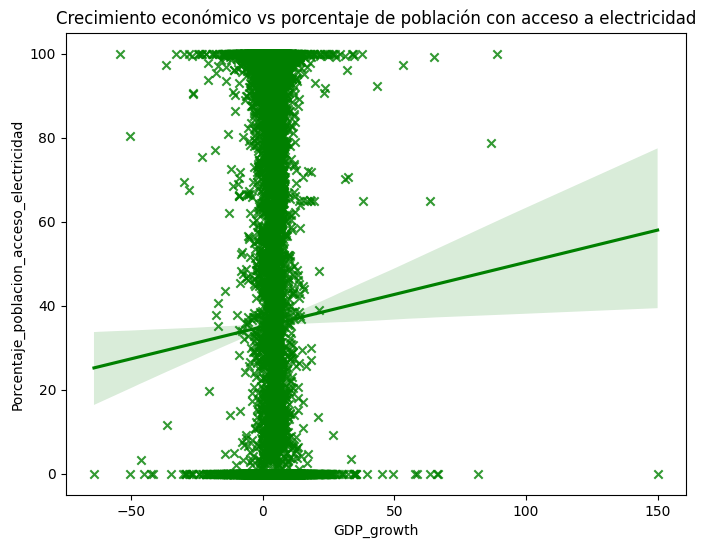

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df_merge, x='GDP_growth', y='Porcentaje_poblacion_acceso_electricidad', color='green', marker='x')
plt.title("Crecimiento económico vs porcentaje de población con acceso a electricidad")

Text(0.5, 1.0, 'Crecimiento económico vs Emisiones de CO2')

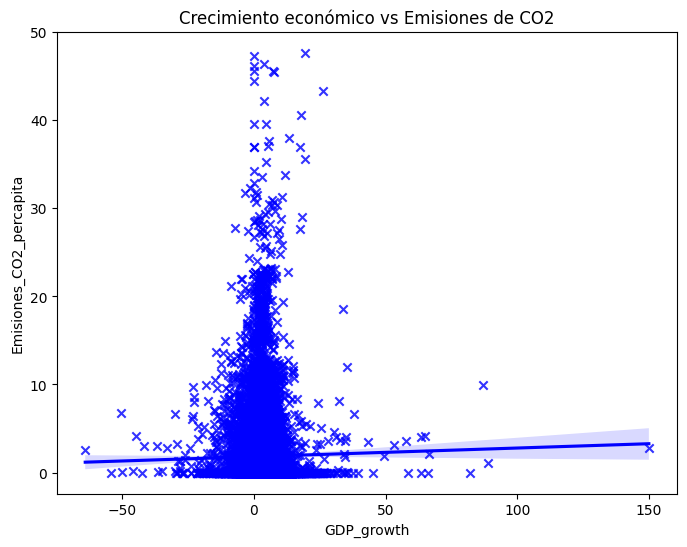

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df_merge, x='GDP_growth', y='Emisiones_CO2_percapita', color='blue', marker='x')
plt.title("Crecimiento económico vs Emisiones de CO2")

Text(0.5, 1.0, 'Crecimiento económico vs Camas de hospital por cada 1000 personas')

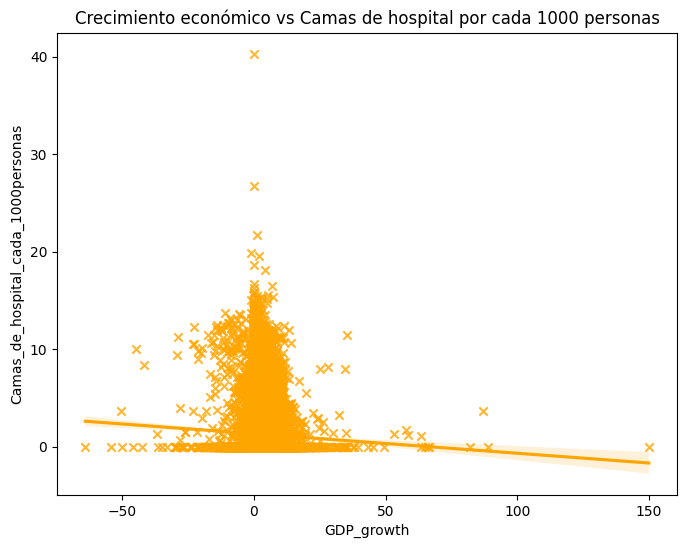

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df_merge, x='GDP_growth', y='Camas_de_hospital_cada_1000personas', color='orange', marker='x')
plt.title("Crecimiento económico vs Camas de hospital por cada 1000 personas")

Text(0.5, 1.0, 'Crecimiento económico vs Participación femenina en la fuerza laboral')

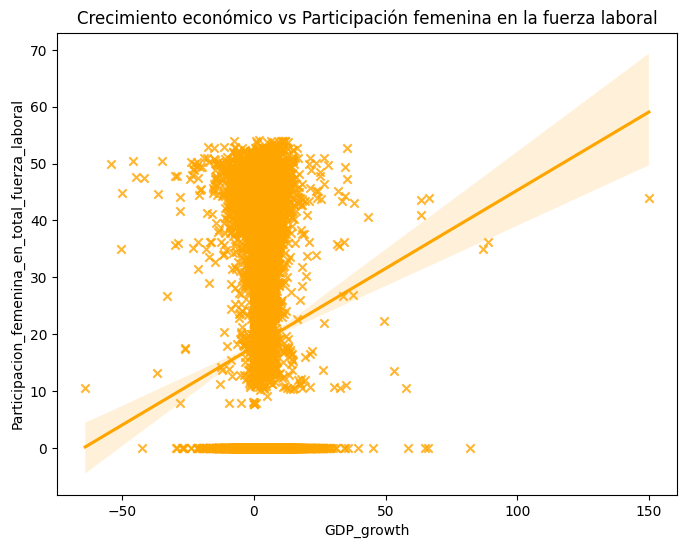

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df_merge, x='GDP_growth', y='Participacion_femenina_en_total_fuerza_laboral', color='orange', marker='x')
plt.title("Crecimiento económico vs Participación femenina en la fuerza laboral")

6.3 Gráficos comparativos entre países de Sudamérica usando funciones

In [ ]:
df_peru = df_merge[df_merge['Country Name'] == 'Peru']
df_peru.head()

,Country Name,Porcentaje_poblacion_acceso_electricidad,year,Porcentaje_poblacion_rural_acceso_electricidad,Emisiones_CO2_percapita,GDP_growth,Camas_de_hospital_cada_1000personas,Participacion_femenina_en_total_fuerza_laboral
154,Peru,0.0,1960,0.0,0.0,0.000000,2.411439,0.0
420,Peru,0.0,1961,0.0,0.0,7.347096,0.000000,0.0
686,Peru,0.0,1962,0.0,0.0,10.035293,0.000000,0.0
952,Peru,0.0,1963,0.0,0.0,4.328250,0.000000,0.0
1218,Peru,0.0,1964,0.0,0.0,6.547868,0.000000,0.0


In [ ]:
df_argentina = df_merge[df_merge['Country Name'] == 'Argentina']
df_argentina.head()

,Country Name,Porcentaje_poblacion_acceso_electricidad,year,Porcentaje_poblacion_rural_acceso_electricidad,Emisiones_CO2_percapita,GDP_growth,Camas_de_hospital_cada_1000personas,Participacion_femenina_en_total_fuerza_laboral
7,Argentina,0.0,1960,0.0,0.0,0.000000,6.352251,0.0
273,Argentina,0.0,1961,0.0,0.0,5.427843,0.000000,0.0
539,Argentina,0.0,1962,0.0,0.0,-0.852022,0.000000,0.0
805,Argentina,0.0,1963,0.0,0.0,-5.308197,0.000000,0.0
1071,Argentina,0.0,1964,0.0,0.0,10.130298,0.000000,0.0


In [ ]:
df_brasil = df_merge[df_merge['Country Name'] == 'Brazil']
df_brasil.head()

,Country Name,Porcentaje_poblacion_acceso_electricidad,year,Porcentaje_poblacion_rural_acceso_electricidad,Emisiones_CO2_percapita,GDP_growth,Camas_de_hospital_cada_1000personas,Participacion_femenina_en_total_fuerza_laboral
26,Brazil,0.0,1960,0.0,0.0,0.0,3.201795,0.0
292,Brazil,0.0,1961,0.0,0.0,8.6,0.000000,0.0
558,Brazil,0.0,1962,0.0,0.0,6.6,0.000000,0.0
824,Brazil,0.0,1963,0.0,0.0,0.6,0.000000,0.0
1090,Brazil,0.0,1964,0.0,0.0,3.4,0.000000,0.0


In [ ]:
df_ecuador = df_merge[df_merge['Country Name'] == 'Ecuador']
df_ecuador.head()

,Country Name,Porcentaje_poblacion_acceso_electricidad,year,Porcentaje_poblacion_rural_acceso_electricidad,Emisiones_CO2_percapita,GDP_growth,Camas_de_hospital_cada_1000personas,Participacion_femenina_en_total_fuerza_laboral
57,Ecuador,0.0,1960,0.0,0.0,0.000000,1.870692,0.0
323,Ecuador,0.0,1961,0.0,0.0,5.124415,0.000000,0.0
589,Ecuador,0.0,1962,0.0,0.0,4.919147,0.000000,0.0
855,Ecuador,0.0,1963,0.0,0.0,2.106368,0.000000,0.0
1121,Ecuador,0.0,1964,0.0,0.0,7.407245,0.000000,0.0


In [ ]:
df_chile = df_merge[df_merge['Country Name'] == 'Chile']
df_chile.head()

,Country Name,Porcentaje_poblacion_acceso_electricidad,year,Porcentaje_poblacion_rural_acceso_electricidad,Emisiones_CO2_percapita,GDP_growth,Camas_de_hospital_cada_1000personas,Participacion_femenina_en_total_fuerza_laboral
40,Chile,0.0,1960,0.0,0.0,0.000000,3.67429,0.0
306,Chile,0.0,1961,0.0,0.0,5.245272,0.00000,0.0
572,Chile,0.0,1962,0.0,0.0,4.026686,0.00000,0.0
838,Chile,0.0,1963,0.0,0.0,5.840140,0.00000,0.0
1104,Chile,0.0,1964,0.0,0.0,2.557221,0.00000,0.0


In [ ]:
df_uruguay = df_merge[df_merge['Country Name'] == 'Uruguay']
df_uruguay.head()

,Country Name,Porcentaje_poblacion_acceso_electricidad,year,Porcentaje_poblacion_rural_acceso_electricidad,Emisiones_CO2_percapita,GDP_growth,Camas_de_hospital_cada_1000personas,Participacion_femenina_en_total_fuerza_laboral
207,Uruguay,0.0,1960,0.0,0.0,0.000000,5.51182,0.0
473,Uruguay,0.0,1961,0.0,0.0,2.493038,0.00000,0.0
739,Uruguay,0.0,1962,0.0,0.0,-1.574549,0.00000,0.0
1005,Uruguay,0.0,1963,0.0,0.0,0.170459,0.00000,0.0
1271,Uruguay,0.0,1964,0.0,0.0,2.440521,0.00000,0.0


In [ ]:
df_bolivia = df_merge[df_merge['Country Name'] == 'Bolivia']
df_bolivia.head()

,Country Name,Porcentaje_poblacion_acceso_electricidad,year,Porcentaje_poblacion_rural_acceso_electricidad,Emisiones_CO2_percapita,GDP_growth,Camas_de_hospital_cada_1000personas,Participacion_femenina_en_total_fuerza_laboral
23,Bolivia,0.0,1960,0.0,0.0,0.000000,1.845419,0.0
289,Bolivia,0.0,1961,0.0,0.0,2.089296,0.000000,0.0
555,Bolivia,0.0,1962,0.0,0.0,5.578918,0.000000,0.0
821,Bolivia,0.0,1963,0.0,0.0,6.797626,0.000000,0.0
1087,Bolivia,0.0,1964,0.0,0.0,3.956597,0.000000,0.0


In [ ]:
df_paraguay = df_merge[df_merge['Country Name'] == 'Paraguay']
df_paraguay.head()

,Country Name,Porcentaje_poblacion_acceso_electricidad,year,Porcentaje_poblacion_rural_acceso_electricidad,Emisiones_CO2_percapita,GDP_growth,Camas_de_hospital_cada_1000personas,Participacion_femenina_en_total_fuerza_laboral
153,Paraguay,0.0,1960,0.0,0.0,0.000000,2.389251,0.0
419,Paraguay,0.0,1961,0.0,0.0,6.900286,0.000000,0.0
685,Paraguay,0.0,1962,0.0,0.0,3.300259,0.000000,0.0
951,Paraguay,0.0,1963,0.0,0.0,4.710291,0.000000,0.0
1217,Paraguay,0.0,1964,0.0,0.0,4.212477,0.000000,0.0


In [ ]:
df_venezuela = df_merge[df_merge['Country Name'] == 'Venezuela, RB']
df_venezuela.head()

,Country Name,Porcentaje_poblacion_acceso_electricidad,year,Porcentaje_poblacion_rural_acceso_electricidad,Emisiones_CO2_percapita,GDP_growth,Camas_de_hospital_cada_1000personas,Participacion_femenina_en_total_fuerza_laboral
210,"Venezuela, RB",0.0,1960,0.0,0.0,0.000000,0.0,0.0
476,"Venezuela, RB",0.0,1961,0.0,0.0,3.192519,0.0,0.0
742,"Venezuela, RB",0.0,1962,0.0,0.0,8.532934,0.0,0.0
1008,"Venezuela, RB",0.0,1963,0.0,0.0,3.900951,0.0,0.0
1274,"Venezuela, RB",0.0,1964,0.0,0.0,11.129345,0.0,0.0


In [ ]:
df_colombia = df_merge[df_merge['Country Name'] == 'Colombia']
df_colombia.head()

,Country Name,Porcentaje_poblacion_acceso_electricidad,year,Porcentaje_poblacion_rural_acceso_electricidad,Emisiones_CO2_percapita,GDP_growth,Camas_de_hospital_cada_1000personas,Participacion_femenina_en_total_fuerza_laboral
42,Colombia,0.0,1960,0.0,0.0,0.000000,2.575547,0.0
308,Colombia,0.0,1961,0.0,0.0,5.089217,0.000000,0.0
574,Colombia,0.0,1962,0.0,0.0,5.411890,0.000000,0.0
840,Colombia,0.0,1963,0.0,0.0,3.286708,0.000000,0.0
1106,Colombia,0.0,1964,0.0,0.0,6.166941,0.000000,0.0


In [ ]:
def Grafico_comparativo_latinoamerica(campo):

      elem1 = alt.Chart(df_peru).mark_line().encode(
      x = alt.X('year'),
      y = alt.Y(campo),
      color = "Country Name"
      ).interactive()

      elem2 = alt.Chart(df_argentina).mark_line().encode(
      x = alt.X('year'),
      y = alt.Y(campo),
      color = "Country Name"
      ).interactive()

      elem3 = alt.Chart(df_uruguay).mark_line().encode(
      x = alt.X('year'),
      y = alt.Y(campo),
      color = "Country Name"
      ).interactive()

      elem4 = alt.Chart(df_colombia).mark_line().encode(
      x = alt.X('year'),
      y = alt.Y(campo),
      color = "Country Name"
      ).interactive()

      elem5 = alt.Chart(df_brasil).mark_line().encode(
      x = alt.X('year'),
      y = alt.Y(campo),
      color = "Country Name"
      ).interactive()

      elem6 = alt.Chart(df_ecuador).mark_line().encode(
      x = alt.X('year'),
      y = alt.Y(campo),
      color = "Country Name"
      ).interactive()

      elem7 = alt.Chart(df_venezuela).mark_line().encode(
      x = alt.X('year'),
      y = alt.Y(campo),
      color = "Country Name"
      ).interactive()

      elem8 = alt.Chart(df_paraguay).mark_line().encode(
      x = alt.X('year'),
      y = alt.Y(campo),
      color = "Country Name"
      ).interactive()

      elem9 = alt.Chart(df_bolivia).mark_line().encode(
      x = alt.X('year'),
      y = alt.Y(campo),
      color = "Country Name"
      ).interactive()

      elem10 = alt.Chart(df_chile).mark_line().encode(
      x = alt.X('year'),
      y = alt.Y(campo),
      color = "Country Name"
      ).interactive()



      return elem1 + elem2 + elem3 + elem4 + elem5 + elem6 + elem7 + elem8 + elem9 + elem10



In [ ]:
Grafico_comparativo_latinoamerica("Porcentaje_poblacion_acceso_electricidad")

alt.LayerChart(...)

forma alternativa

In [ ]:
def grafico_paises3(campo):
          paises_interes = ["Peru", "Argentina", "Brazil","Colombia","Chile","Ecuador","Bolivia","Uruguay","Paraguay","Venezuela, RB"]
          df_filtrado = df_merge[df_merge['Country Name'].isin(paises_interes)]
          plt.figure(figsize=(10, 10))
          sns.lineplot(data=df_filtrado, x='year', y=campo, hue='Country Name')
          return plt.show()

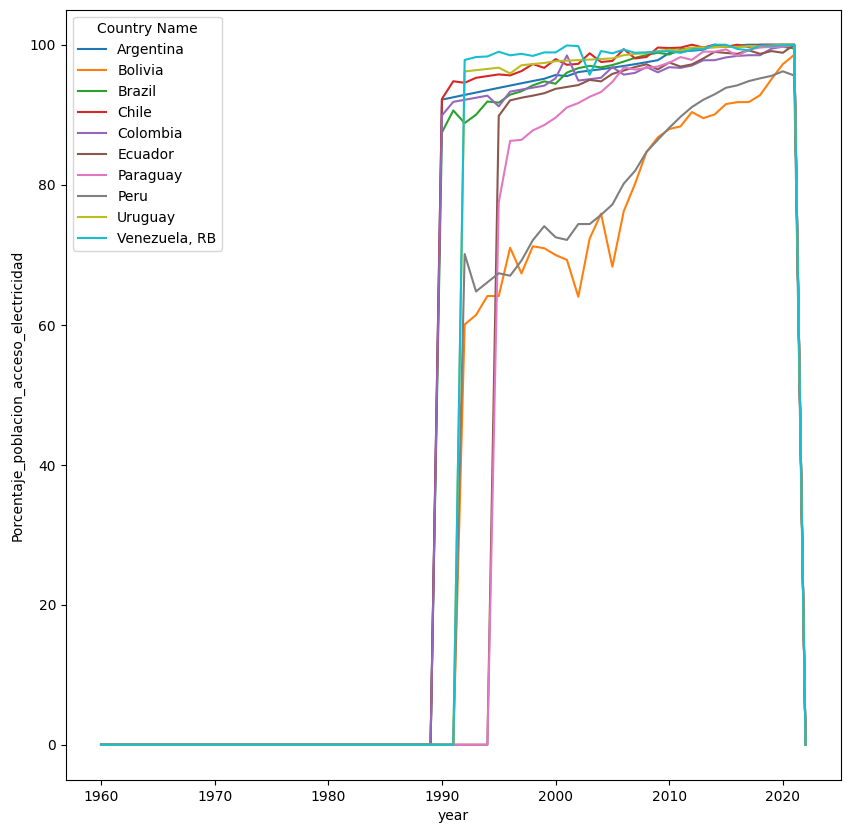

In [ ]:
grafico_paises3("Porcentaje_poblacion_acceso_electricidad")

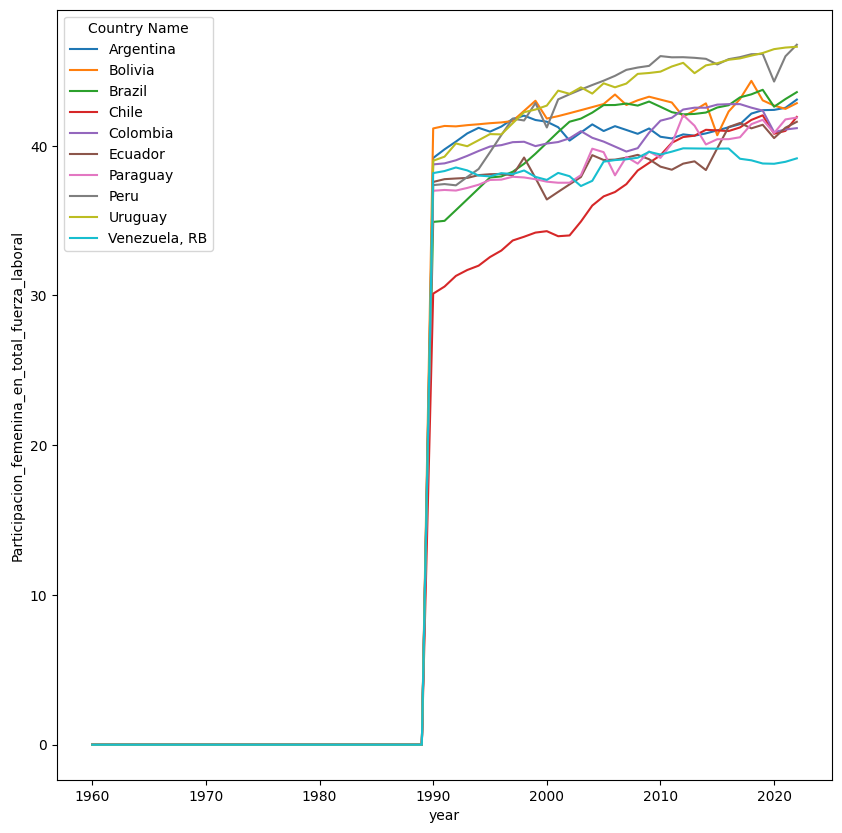

In [235]:
grafico_paises3("Participacion_femenina_en_total_fuerza_laboral")

6.4. Perspectivas a futuro

teniendo como base los países que más destacan en cada una de estas variables en el año del 2022

In [ ]:
df_merge_2022 = df_merge[df_merge['year'] == 2022]

In [ ]:
alt.Chart(df_merge_2022).mark_point().encode(
    alt.X("GDP_growth"),
    alt.Y("Country Name"),
    tooltip = ["Country Name", "GDP_growth"]
).properties(
    title="Gráfico de Puntos: Crecimiento del PIB por País en el 2022"
)



alt.Chart(...)

In [233]:
alt.Chart(df_merge_2022).mark_point().encode(
    alt.X("Participacion_femenina_en_total_fuerza_laboral"),
    alt.Y("Country Name"),
    tooltip = ["Country Name", "Participacion_femenina_en_total_fuerza_laboral"]
).properties(
    title="Gráfico de Puntos: Participación femenina en la fuerza laboral por País en el 2022"
)



alt.Chart(...)